In [1]:
library(Seurat)
library(ggplot2)
library(dplyr)
library(stringr)
library(Sierra)
library(presto)
library(ggplot2)
library(msigdbr)
library(fgsea)
library(Seurat)
library(tidyverse)
setwd('/data/APAproject/post_qual/data/all_in/')

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
"replacing previous import 'GenomicRanges::union' by 'dplyr::union' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::intersect' by 'dplyr::intersect' when loading 'Sierra'"
Warning message:
"replacing previous import 'GenomicRanges::setdiff' by 'dplyr::setdiff' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::tail' by 'utils::tail' when loading 'Sierra'"
Warning message:
"replacing previous import 'Gviz::head' by 'utils::head' when loading 'Sierra'"
Loading required package: Rcpp

Loading required package: data.table


Attaching package: 'data.table'


The following objects are masked from 'package:dplyr':

    between, first, last


Registered S3 method overwritten by 'cli':
  method     f

In [2]:
## read in the Dim and Nagy control and merge them
Nagy_control_ge <- readRDS('../Nagy_mdd/rdata/ge_so_control_Nagy.rds')
Dim_control_ge <- readRDS('../Dimitry_Velmeshev_ASD/rdata/Control_cell_types_GE_PFC.rds')

In [3]:
Nagy_control_ge$study <- 'Nagy'
Dim_control_ge$study <- 'Dim'
all_control_ge <- merge(Nagy_control_ge, Dim_control_ge)

In [12]:
sum(table(all_control_ge$cellType))

[1] 65359

In [4]:
remove(Dim_control_ge)
remove(Nagy_control_ge)

In [5]:
all_control_ge <- NormalizeData(all_control_ge, normalization.method = "LogNormalize",scale.factor = 10000, verbose = F)
all_control_ge <- FindVariableFeatures(object = all_control_ge,selection.method = "vst", nfeatures = 2000, verbose = F)
all_control_ge <- ScaleData(all_control_ge, features = rownames(all_control_ge))
all_control_ge <- RunPCA(all_control_ge, features = VariableFeatures(object = all_control_ge), verbose = F)

Centering and scaling data matrix



In [6]:
all_control_ge <- RunUMAP(all_control_ge , dims = 1:20, min.dist = 0.001,  n_neighbors = 50)    ##parameteres need to be set
all_control_ge <- FindNeighbors(all_control_ge, dims = 1:20)
#find cluster
all_control_ge <- FindClusters(all_control_ge, resolution =1)

Warning message:
"The following arguments are not used: n_neighbors"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
16:06:16 UMAP embedding parameters a = 1.929 b = 0.7915

16:06:16 Read 65359 rows and found 20 numeric columns

16:06:16 Using Annoy for neighbor search, n_neighbors = 30

16:06:17 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:06:24 Writing NN index file to temp file /tmp/Rtmpp0DrL9/file27543990b8a5

16:06:24 Searching Annoy index using 1 thread, search_k = 3000

16:06:47 Annoy recall = 100%

16:06:50 Commencing smo

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65359
Number of edges: 2038461

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9234
Number of communities: 36
Elapsed time: 17 seconds


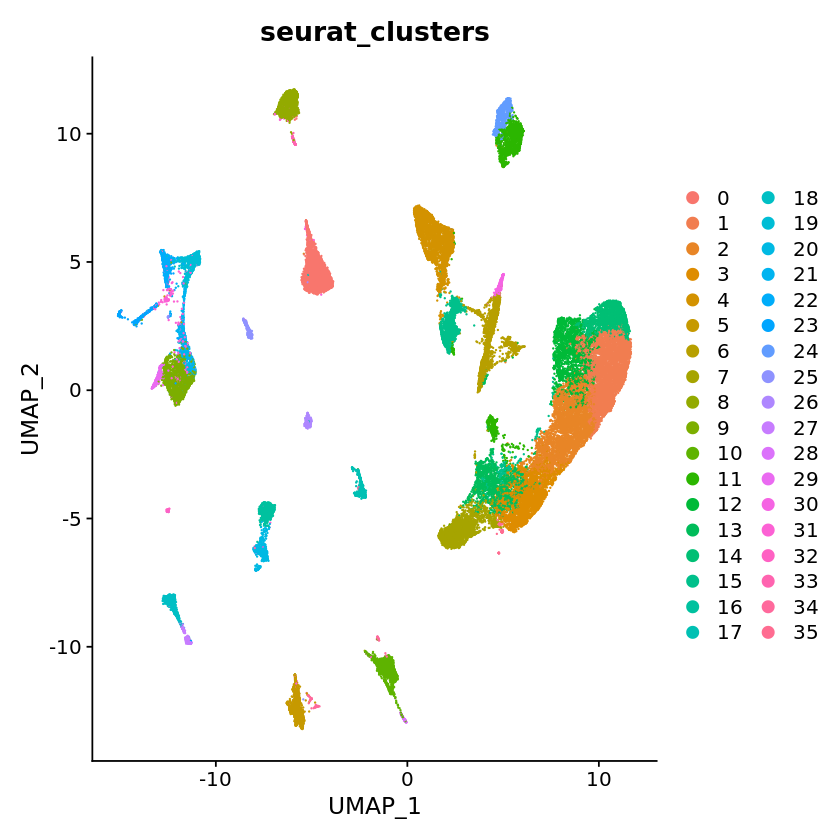

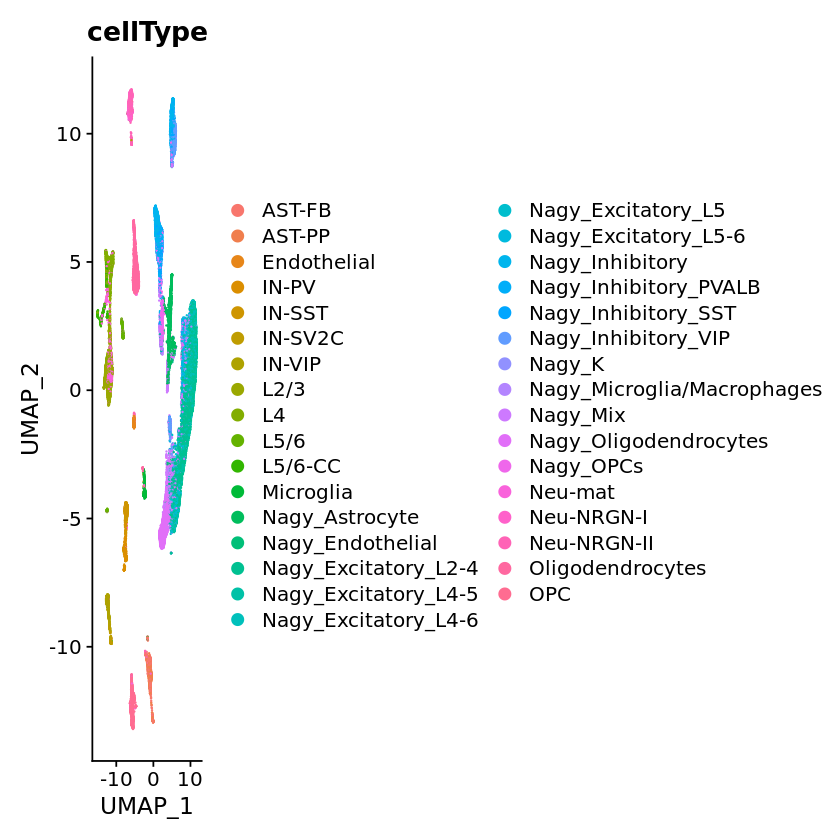

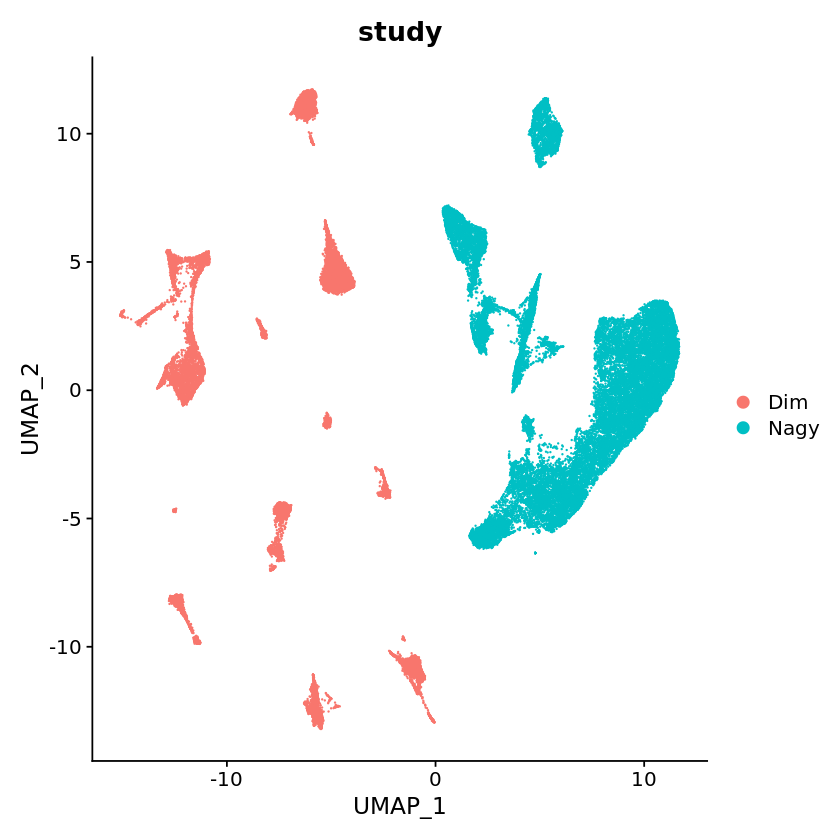

In [7]:
DimPlot(all_control_ge, reduction='umap', group.by='seurat_clusters')
DimPlot(all_control_ge, reduction='umap', group.by='cellType')
DimPlot(all_control_ge, reduction='umap', group.by='study')

In [9]:
so.list <- SplitObject(all_control_ge, split.by = "study")
so.list <- lapply(X = so.list, FUN = SCTransform)
features <- SelectIntegrationFeatures(object.list = so.list, nfeatures = 2000)
so.list <- PrepSCTIntegration(object.list = so.list, anchor.features = features)
ge_so.anchors <- FindIntegrationAnchors(object.list = so.list, normalization.method = "SCT",
    anchor.features = features)
all_control_ge <- IntegrateData(anchorset = ge_so.anchors, normalization.method = "SCT")

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 27190 by 35212

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 33 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 27190 genes



  |======================================================================| 100%


Computing corrected count matrix for 27190 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.161429 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 33415 by 30147

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"


  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 52 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 33415 genes



  |======================================================================| 100%


Computing corrected count matrix for 33415 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 7.011446 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'head': 'x' must be atomic


In [12]:
all_control_ge <- RunPCA(all_control_ge, verbose = FALSE)
all_control_ge <- RunUMAP(all_control_ge, reduction = "pca", dims = 1:20)

16:42:35 UMAP embedding parameters a = 0.9922 b = 1.112

16:42:35 Read 65359 rows and found 20 numeric columns

16:42:35 Using Annoy for neighbor search, n_neighbors = 30

16:42:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:42:44 Writing NN index file to temp file /tmp/Rtmpp0DrL9/file275459990dfb

16:42:44 Searching Annoy index using 1 thread, search_k = 3000

16:43:07 Annoy recall = 100%

16:43:09 Commencing smooth kNN distance calibration using 1 thread

16:43:10 16 smooth knn distance failures

16:43:14 Found 2 connected components, 
falling back to 'spca' initialization with init_sdev = 1

16:43:14 Initializing from PCA

16:43:14 PCA: 2 components explained 55% variance

16:43:15 Commencing optimization for 200 epochs, with 2616376 positive edges

16:43:57 

In [32]:
## apparently the feature names are not matching between Nagy and Dim, the Nagy has two columns so lets first 
## correct that
# tst <- "RP5-857K21.4  RP5-857K21.4"
# str_sp <- str_split(tst,' ', n = Inf , simplify = T)[[1]]
# str_s
correct_genes <- function(x){
    gene <- str_split(x, ' ', n = Inf , simplify = T)[[1]]
    return (gene)
}
tst_vec <- sapply(rownames(Nagy_control_ge), correct_genes)

[1] "character"

In [47]:
tst_vec <- data.frame(tst_vec)
dim(tst_vec)

[1] 30062     1

In [55]:
tst_vec[1]

,tst_vec
,<chr>
RP11-34P13.3 RP11-34P13.3,RP11-34P13.3
RP11-34P13.7 RP11-34P13.7,RP11-34P13.7
RP11-34P13.14 RP11-34P13.14,RP11-34P13.14
FO538757.3 FO538757.3,FO538757.3
FO538757.2 FO538757.2,FO538757.2
AP006222.2 AP006222.2,AP006222.2
RP5-857K21.15 RP5-857K21.15,RP5-857K21.15
RP4-669L17.2 RP4-669L17.2,RP4-669L17.2
RP4-669L17.10 RP4-669L17.10,RP4-669L17.10


In [56]:
RNAassay <- GetAssay(Nagy_control_ge, assay = 'RNA'))
rownames(RNAassay)[10]

ERROR: Error in as.data.frame.default(x[[i]], optional = TRUE): cannot coerce class 'structure("Assay", package = "SeuratObject")' to a data.frame


In [58]:
rownames(RNAassay@counts) <- tst_vec$tst_vec

In [63]:
rownames(Nagy_control_ge@assays$RNA@key) <- tst_vec$tst_vec

In [77]:
rownames(Nagy_control_ge@assays$RNA@meta.features) <- tst_vec$tst_vec

In [79]:
Nagy_control_ge <- FindVariableFeatures(object = Nagy_control_ge, selection.method = "vst", nfeatures = 2000, verbose = F)
Dim_control_ge <- FindVariableFeatures(object = Dim_control_ge, selection.method = "vst", nfeatures = 2000, verbose = F)

In [82]:
so.list <- list(Nagy=Nagy_control_ge, Dim=Dim_control_ge)
so.list <- lapply(X = so.list, FUN = SCTransform)
features <- SelectIntegrationFeatures(object.list = so.list, nfeatures = 2500)
print('feature selection is done')
so.list <- PrepSCTIntegration(object.list = so.list, anchor.features = features)
ge_so.anchors <- FindIntegrationAnchors(object.list = so.list, normalization.method = "SCT",
    anchor.features = features)
print('got the anchors')
all_control_ge <- IntegrateData(anchorset = ge_so.anchors, normalization.method = "SCT")
print('integration is done')
all_control_ge <- RunPCA(all_control_ge, verbose = FALSE)
all_control_ge <- RunUMAP(all_control_ge, reduction = "pca", dims = 1:20)

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 27190 by 35212

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 33 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 27190 genes



  |======================================================================| 100%


Computing corrected count matrix for 27190 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.467421 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT

Calculating cell attributes from input UMI matrix: log_umi

Variance stabilizing transformation of count matrix of size 33415 by 30147

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 5000 cells



  |                                                                      |   0%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"


  |==================                                                    |  25%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |===================================                                   |  50%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |====================================================                  |  75%

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):
"iteration limit reached"
Warning message in theta.ml(y = y, mu = fit$fitted):

  |======================================================================| 100%


Found 52 outliers - those will be ignored in fitting/regularization step


Second step: Get residuals using fitted parameters for 33415 genes



  |======================================================================| 100%


Computing corrected count matrix for 33415 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 6.797673 mins

Determine variable features

Place corrected count matrix in counts slot

Centering data matrix

Set default assay to SCT



[1] "feature selection is done"


Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 39612 anchors

Filtering anchors

	Retained 26633 anchors



[1] "got the anchors"


Merging dataset 2 into 1

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



[1] "integration is done"


23:13:57 UMAP embedding parameters a = 0.9922 b = 1.112

23:13:58 Read 65359 rows and found 20 numeric columns

23:13:58 Using Annoy for neighbor search, n_neighbors = 30

23:13:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:14:08 Writing NN index file to temp file /tmp/Rtmpp0DrL9/file27547653e94a

23:14:08 Searching Annoy index using 1 thread, search_k = 3000

23:14:35 Annoy recall = 100%

23:14:37 Commencing smooth kNN distance calibration using 1 thread

23:14:43 Initializing from normalized Laplacian + noise

23:14:51 Commencing optimization for 200 epochs, with 2961328 positive edges

23:15:36 Optimization finished



In [133]:
all_control_ge <- RunPCA(all_control_ge, features = VariableFeatures(object = all_control_ge), verbose = F)
all_control_ge <- RunUMAP(all_control_ge , dims = 1:20, min.dist = 0.001,  n_neighbors = 50)    ##parameteres need to be set
all_control_ge <- FindNeighbors(all_control_ge, dims = 1:20)
#find cluster
all_control_ge <- FindClusters(all_control_ge, resolution =1)

Warning message:
"The following arguments are not used: n_neighbors"
23:17:54 UMAP embedding parameters a = 1.929 b = 0.7915

23:17:54 Read 65359 rows and found 20 numeric columns

23:17:54 Using Annoy for neighbor search, n_neighbors = 30

23:17:54 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

23:18:03 Writing NN index file to temp file /tmp/Rtmpp0DrL9/file275466b755d4

23:18:03 Searching Annoy index using 1 thread, search_k = 3000

23:18:29 Annoy recall = 100%

23:18:30 Commencing smooth kNN distance calibration using 1 thread

23:18:36 Initializing from normalized Laplacian + noise

23:18:44 Commencing optimization for 200 epochs, with 2961328 positive edges

23:19:28 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 65359
Number of edges: 2400180

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9197
Number of communities: 36
Elapsed time: 20 seconds


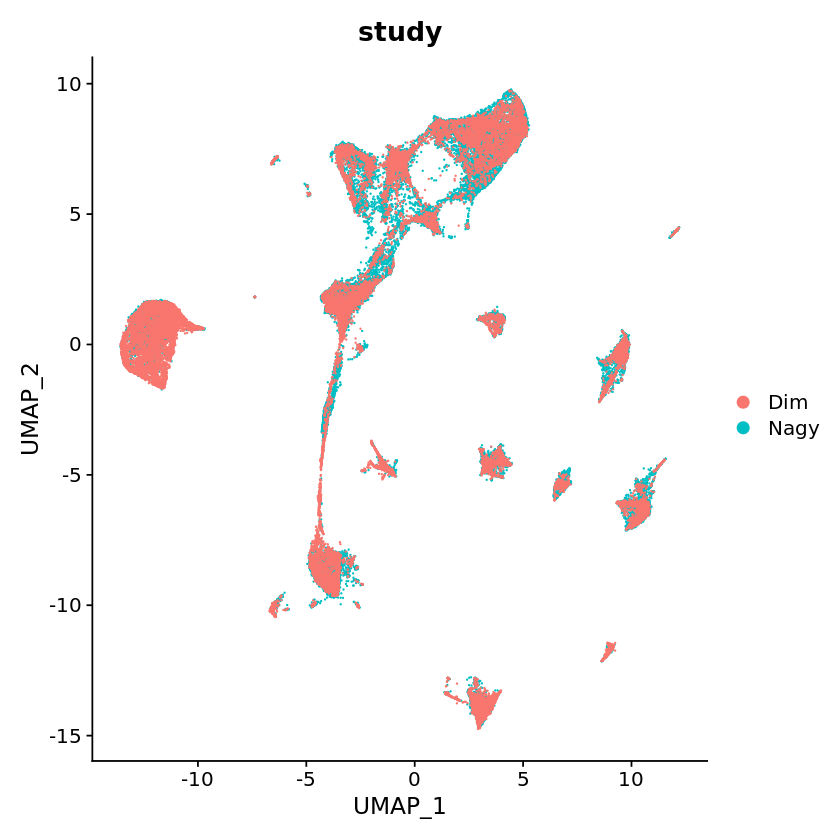

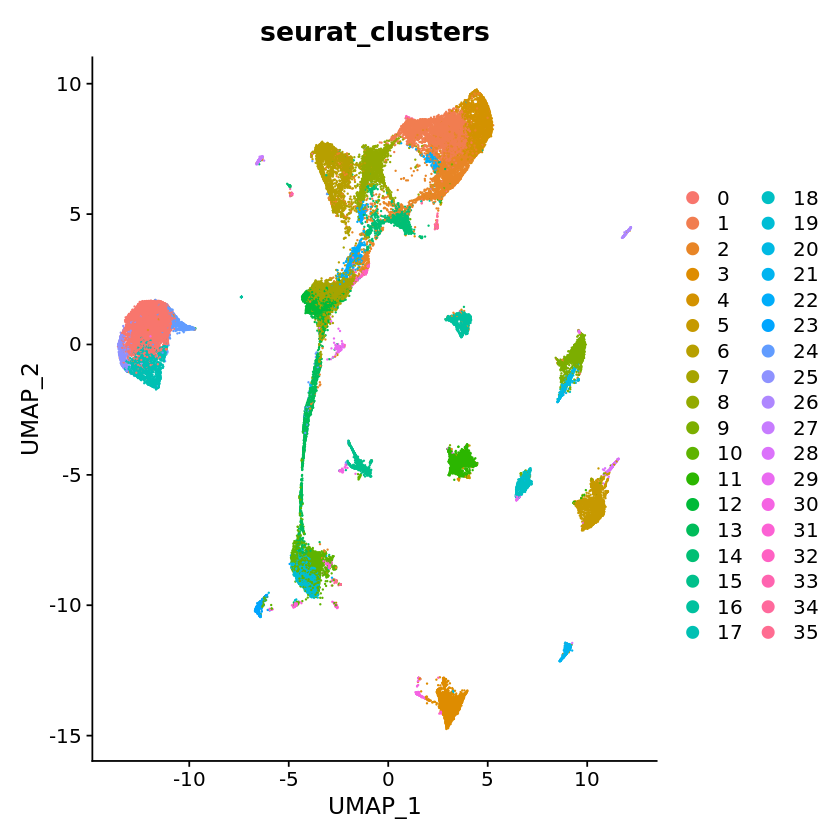

png 
  2

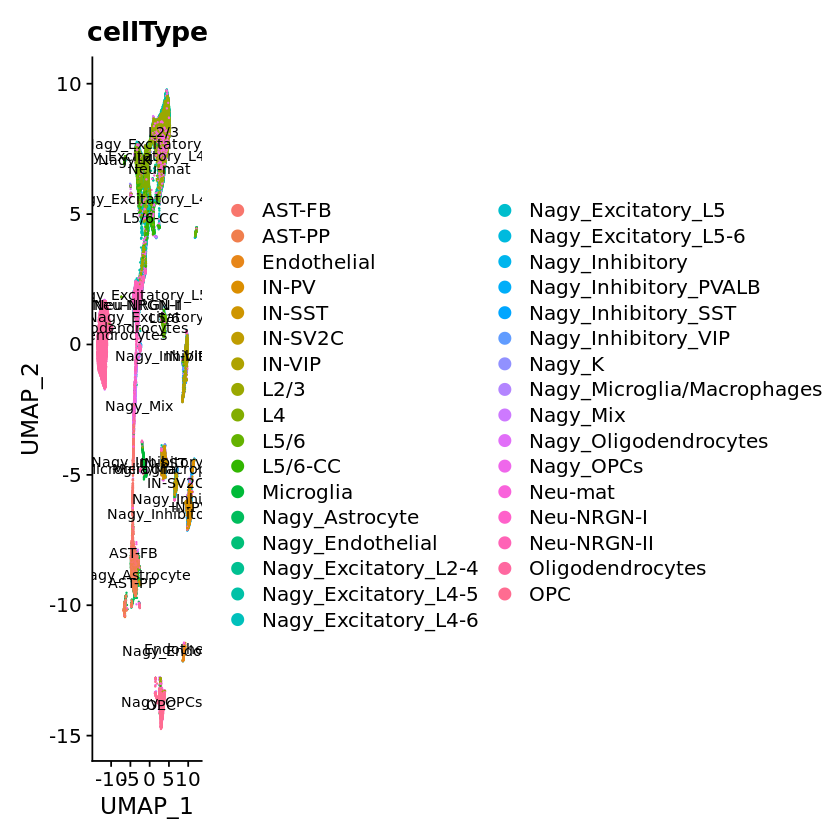

In [134]:
DimPlot(all_control_ge, reduction = 'umap', group.by='study')
DimPlot(all_control_ge, reduction = 'umap', group.by='seurat_clusters')
DimPlot(all_control_ge, reduction = 'umap', group.by='cellType',label=T, label.size = 3)
results_root <- '/data/APAproject/post_qual/data/all_in/results/'
plotname <- paste0(results_root, 'all_control_Nagy_Dim_integrated.pdf')
pdf(file=plotname, width = 40, height = 20, paper='A4r', onefile=T)
DimPlot(all_control_ge, reduction = 'umap', group.by='study')
DimPlot(all_control_ge, reduction = 'umap', group.by='seurat_clusters',label=T)
DimPlot(all_control_ge, reduction = 'umap', group.by='cellType')
DimPlot(all_control_ge, reduction = 'umap', group.by='cellType', label=T, label.size = 4,repel=TRUE)
dev.off()

In [135]:
df <- data.frame(seurat_cluster = all_control_ge$seurat_clusters, celltype = all_control_ge$cellType)
df

,seurat_cluster,celltype
,<fct>,<chr>
Ex_10_L2_4.3_Control_B3_AAACCTGAGGTAGCCA,4,Nagy_Excitatory_L2-4
Inhib_5.3_Control_B3_AAACCTGCAAACTGTC,5,Nagy_Inhibitory
Ex_10_L2_4.3_Control_B3_AAACCTGCAACAACCT,4,Nagy_Excitatory_L2-4
Ex_8_L5_6.3_Control_B3_AAACCTGGTCCGAACC,16,Nagy_Excitatory_L5-6
Inhib_2_VIP.3_Control_B3_AAACCTGGTCGTGGCT,9,Nagy_Inhibitory_VIP
Mix_2.3_Control_B3_AAACGGGAGGAACTGC,13,Nagy_Mix
Oligos_3.3_Control_B3_AAACGGGAGTGGTAGC,0,Nagy_Oligodendrocytes
Ex_7_L4_6.3_Control_B3_AAACGGGAGTGTGAAT,6,Nagy_Excitatory_L4-6
Astros_3.3_Control_B3_AAACGGGCATCCAACA,19,Nagy_Astrocyte


In [121]:
df_tmp <- df%>%filter(seurat_cluster=='30')%>%count(celltype)
df_tmp

celltype,n
<chr>,<int>
IN-PV,40
IN-SST,9
IN-VIP,1
L2/3,8
L4,2
L5/6,1
L5/6-CC,1
Nagy_Astrocyte,5
Nagy_Endothelial,1


In [130]:
p <-ggplot(data=df, aes(x=seurat_cluster, y=celltype, fill=celltype, label = celltype)) +
  geom_bar(stat="identity") + geom_text(size = 3, position = position_stack(vjust = 0.5)) + coord_flip()
plotname <- paste0(results_root, 'all_in_cluster_composition.pdf')
pdf(file=plotname, width = 40, height = 20, onefile=T)
print(p)
dev.off()

png 
  2

In [138]:
for (cluster in unique(all_control_ge$seurat_clusters)){
    df_tmp <- df%>%filter(seurat_cluster==cluster)%>%count(celltype)
    p <-ggplot(data=df_tmp, aes(x=celltype, y=n, fill=celltype, label=celltype)) +
      geom_bar(stat="identity") + geom_text(size = 3, position = position_stack(vjust = 0.5)) + coord_flip()
    plotname <- paste0(results_root, cluster,'_composition.pdf')
    pdf(file=plotname, width = 20, height = 20, paper='A4r' , onefile=T)
    print(p)
    dev.off()
}


In [139]:
saveRDS(all_control_ge, file = 'rdata/all_in_control_ge.rds')

In [1]:
all_control_ge

ERROR: Error in eval(expr, envir, enclos): object 'all_control_ge' not found
